# IEEE-CIS Vesta Fraud Dataset Prepocessing

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
fig_folder = '../figures/'

# Data folder

In [35]:
# Data Folder
data_folder = '/Users/efonesca.dos.reis/mrm_fraud/datasets/fdb_ieee/'

# Load data

In [36]:
def load_data(file_name, file_folder):
    df = pd.read_csv(file_folder+file_name)
    return df

## Train

In [131]:
%%time
# Load data
file_name = 'ieeecis_train.csv'
train_df = load_data(file_name, data_folder)

CPU times: user 1.63 s, sys: 297 ms, total: 1.93 s
Wall time: 1.96 s


In [38]:
train_df.head(3)

,TransactionID,EVENT_LABEL,transactionamt,productcd,card1,card2,card3,card5,card6,addr1,...,id_17,id_19,id_20,devicetype,deviceinfo,EVENT_ID,ENTITY_ID,EVENT_TIMESTAMP,LABEL_TIMESTAMP,ENTITY_TYPE
0,2987000.0,0,68.5,W,13926.0,NaN,150.0,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,2ee0b31b-07b7-41ae-a136-d2d2d69ff8a2,13926.0_315.0_-13.0,2021-01-02T00:00:00Z,2025-01-30T15:22:33Z,user
1,2987001.0,0,29.0,W,2755.0,404.0,150.0,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,8a4f3585-d4fe-4ac2-a2fa-b57548b04806,2755.0_325.0_1.0,2021-01-02T00:00:01Z,2025-01-30T15:22:33Z,user
2,2987002.0,0,59.0,W,4663.0,490.0,150.0,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,4aa1edae-c4ff-4c09-be07-eecd9f239748,4663.0_330.0_1.0,2021-01-02T00:01:09Z,2025-01-30T15:22:33Z,user


<Axes: >

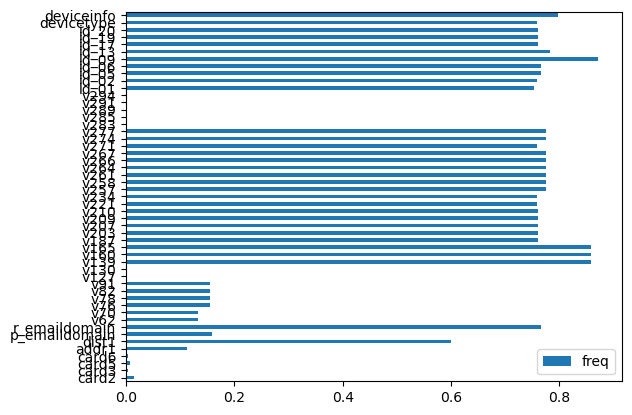

In [39]:
missing_values = train_df.isna().sum()/len(train_df)
missing_values = pd.DataFrame(missing_values.loc[missing_values != 0], columns=['freq'])
missing_values.plot(kind='barh' )

In [40]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561013 entries, 0 to 561012
Data columns (total 74 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    561013 non-null  float64
 1   EVENT_LABEL      561013 non-null  int64  
 2   transactionamt   561013 non-null  float64
 3   productcd        561013 non-null  object 
 4   card1            561013 non-null  float64
 5   card2            552409 non-null  float64
 6   card3            559449 non-null  float64
 7   card5            556855 non-null  float64
 8   card6            559443 non-null  object 
 9   addr1            498129 non-null  float64
 10  dist1            224650 non-null  float64
 11  p_emaildomain    471749 non-null  object 
 12  r_emaildomain    131663 non-null  object 
 13  c1               561013 non-null  float64
 14  c2               561013 non-null  float64
 15  c4               561013 non-null  float64
 16  c5               561013 non-null  floa

<Axes: >

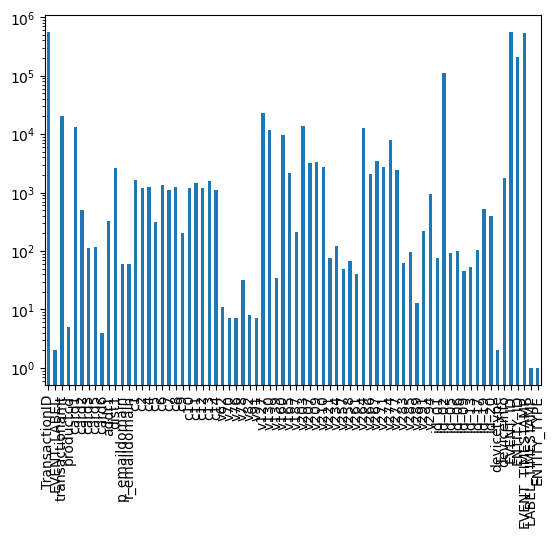

In [41]:
train_df.nunique().plot(kind='bar', logy=True)

## Test

In [165]:
%%time
# Load data
file_name = 'ieeecis_test.csv'
test_df = load_data(file_name, data_folder)

CPU times: user 101 ms, sys: 33.8 ms, total: 135 ms
Wall time: 141 ms


In [154]:
%%time
# Load data
file_name = 'ieeecis_test_labels.csv'
test_labels_df = load_data(file_name, data_folder)

CPU times: user 16.8 ms, sys: 5.72 ms, total: 22.6 ms
Wall time: 28.9 ms


In [169]:
# Add fraud labels
test_df = pd.merge(test_df, test_labels_df, on=['TransactionID', 'EVENT_ID'], how='inner')

In [172]:
test_df.head(3)

,TransactionID,transactionamt,productcd,card1,card2,card3,card5,card6,addr1,dist1,...,id_17,id_19,id_20,devicetype,deviceinfo,EVENT_ID,ENTITY_ID,EVENT_TIMESTAMP,ENTITY_TYPE,EVENT_LABEL
0,3548013.0,125.0,S,15775.0,481.0,150.0,102.0,credit,330.0,NaN,...,166.0,633.0,533.0,desktop,Windows,7b68162a-49d7-4749-952e-b38294185418,15775.0_330.0_129.0,2021-06-21T23:11:15Z,user,0
1,3548014.0,125.0,S,15775.0,481.0,150.0,102.0,credit,330.0,NaN,...,166.0,633.0,533.0,desktop,Windows,cd61f0d0-69aa-486d-85a7-156fca725ddc,15775.0_330.0_129.0,2021-06-21T23:11:29Z,user,0
2,3548015.0,125.0,S,15775.0,481.0,150.0,102.0,credit,330.0,NaN,...,166.0,633.0,533.0,desktop,Windows,95b0968c-871a-4874-9100-64e5e038b329,15775.0_330.0_129.0,2021-06-21T23:11:45Z,user,0


<Axes: >

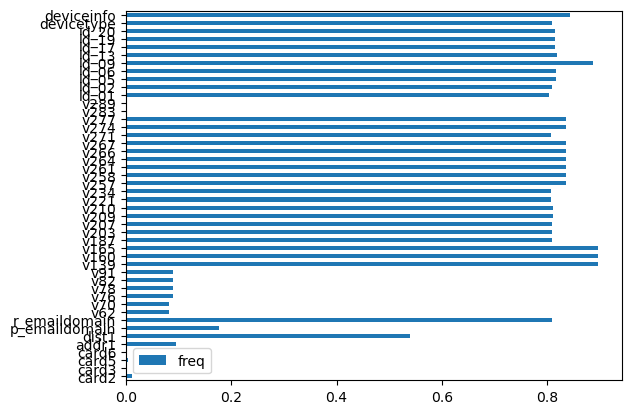

In [130]:
missing_values = test_df.isna().sum()/len(test_df)
missing_values = pd.DataFrame(missing_values.loc[missing_values != 0], columns=['freq'])
missing_values.plot(kind='barh' )

In [133]:
del test_missing_values, train_missing_values

In [134]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29527 entries, 0 to 29526
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    29527 non-null  float64
 1   transactionamt   29527 non-null  float64
 2   productcd        29527 non-null  object 
 3   card1            29527 non-null  float64
 4   card2            29198 non-null  float64
 5   card3            29526 non-null  float64
 6   card5            29426 non-null  float64
 7   card6            29526 non-null  object 
 8   addr1            26705 non-null  float64
 9   dist1            13619 non-null  float64
 10  p_emaildomain    24335 non-null  object 
 11  r_emaildomain    5628 non-null   object 
 12  c1               29527 non-null  float64
 13  c2               29527 non-null  float64
 14  c4               29527 non-null  float64
 15  c5               29527 non-null  float64
 16  c6               29527 non-null  float64
 17  c7          

<Axes: >

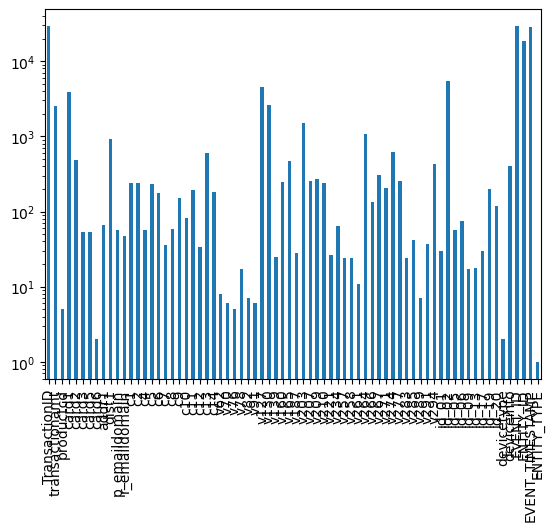

In [135]:
test_df.nunique().plot(kind='bar', logy=True)

# Preporcess data

In [110]:
def add_time(df):
    # Add transaction time column
    eventTime = pd.to_datetime(df.EVENT_TIMESTAMP)
    df.insert(1, 'transactionTime', eventTime)

    # Sort dataframe by transaction time
    df.sort_values(by='transactionTime', inplace=True)

    # General temporal features
    df.insert(2, 'hour', df['transactionTime'].dt.hour)
    df.insert(2, 'weekday', df['transactionTime'].dt.dayofweek)
    df.insert(2, 'month', df['transactionTime'].dt.month)
    df.insert(2, 'year', df['transactionTime'].dt.year)
def rename_columns(df):
    # Rename columns
    df.rename(columns={'EVENT_LABEL':'isFraud', 
                       'transactionamt':'Amount'
                      },
              inplace=True
             )
def preprocess_data(df):
    rename_columns(df)
    add_time(df)

In [111]:
%%time
# Load data
file_name = 'ieeecis_train.csv'
train_df = load_data(file_name, data_folder)

CPU times: user 1.65 s, sys: 271 ms, total: 1.92 s
Wall time: 1.96 s


In [178]:
preprocess_data(train_df)

In [174]:
preprocess_data(test_df)

In [183]:
def plot_fraud(data, tw=None):

    axis_label_fs = 9
    axis_tick_fs = 8
    legend_fs = 8
    title_fs = 9
    
    fig, ax = plt.subplots(3, 1, figsize=(8, 6), sharex=True)
    
    
    # Number and value of fraud
    x = data.groupby(tw, as_index=True)['isFraud'].sum()
    y = data.loc[data.isFraud == 1].groupby(tw)['Amount'].sum()
    ax[0].bar(x.index, x.values, label='No. of fraud')
    ax01 = ax[0].twinx()
    ax01.plot(y.index, y.values/1e5, c='tab:red', marker='o', label='Total amount')
    
    # Class imbalance
    fraud_imb = 100*data.groupby(tw)['isFraud'].sum()/data.groupby(tw)['isFraud'].count()
    ax[1].plot(fraud_imb.index, fraud_imb.values)
    
    # Total number of transactions
    ntx = data.groupby(tw)['isFraud'].count()
    ax[2].bar(ntx.index, ntx.values/1e3)
    
    
    # Formatting
    
    ax[0].set_ylabel('No. of fraud', fontsize=axis_label_fs)
    ax[0].legend(loc='upper left', bbox_to_anchor=(0.01, 0.99), fontsize=legend_fs)
    ax[0].set_title('(a)', fontsize=title_fs, loc='left')
    ax01.set_ylabel('Fraud value '+r'$(\times 10^5 \$)$', fontsize=axis_label_fs)
    ax01.legend(loc='upper left', bbox_to_anchor=(0.01, 0.83), fontsize=legend_fs)
    
    ax[1].grid(axis='both')
    ax[1].set_title('(b)', loc='left', fontsize=title_fs)
    ax[1].set_ylabel('Class imbalance (%)', fontsize=axis_label_fs)
    
    ax[2].set_ylabel('No. of transactions '+r'$(\times 10^3)$', fontsize=axis_label_fs)
    ax[2].set_title('(c)', loc='left', fontsize=title_fs)
    ax[2].set_xlabel(tw, fontsize=axis_label_fs)
    
    
    ax[0].set_xticks(x.index, x.index, rotation=90, fontsize=axis_tick_fs)
    ax01.set_yticks(np.arange(7), np.arange(7))
    ax[1].set_xticks(x.index, x.index, rotation=90, fontsize=axis_tick_fs)
    ax[2].set_xticks(x.index, x.index, rotation=90, fontsize=axis_tick_fs)
    
    ax[0].tick_params(labelsize=axis_tick_fs)
    ax01.tick_params(labelsize=axis_tick_fs)
    ax[1].tick_params(labelsize=axis_tick_fs)
    ax[2].tick_params(labelsize=axis_tick_fs)
    
    # xlim=[1996, 2019]
    # ax[0].set_xlim(xlim)
    # ax[0].set_xlim(xlim)
    
    plt.subplots_adjust(hspace=0.3)
    # plt.savefig(fig_folder+'TabFormer_dataset.png', bbox_inches='tight', dpi=300)
    plt.show()

Train


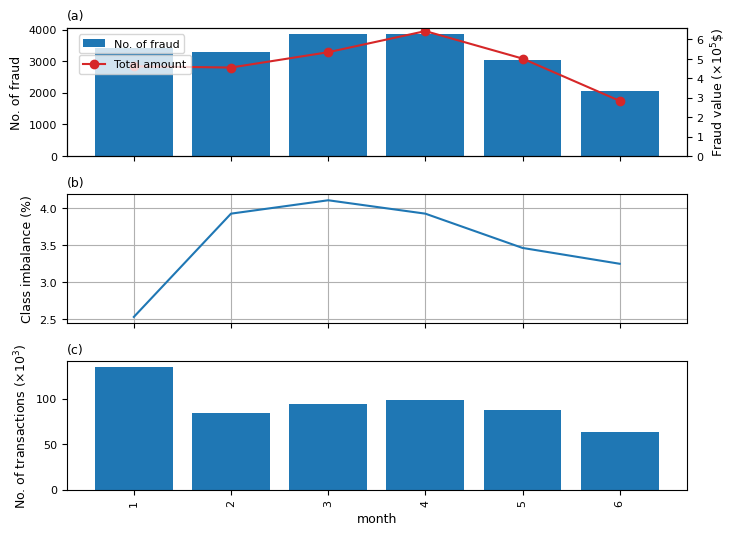

In [184]:
print('Train')
plot_fraud(train_df, tw='month')

Test


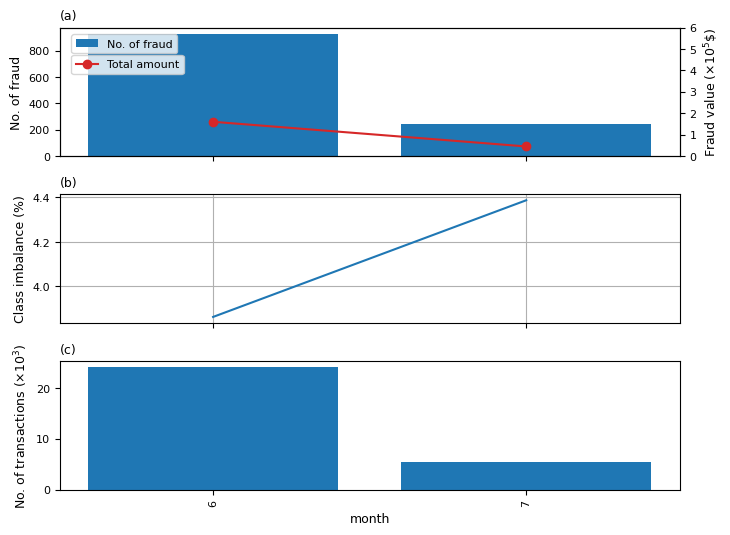

In [185]:
print('Test')
plot_fraud(test_df, tw='month')